# Computer Vision - Cnn

About Dataset

Context
- This data set contains two class of images Cats and Dogs. This can be best utilized in a binary classification problem set in computer vision.

Zadanie do wykonania 

Zadanie polega na zbudowaniu sieci głębokiej rozróżniającej psy i koty na zdjęciach ze wskazanego zbioru.

1. Sieć musi posiadać warstwy konwolucyjne.
2. Model nie może charakteryzować się współczynnikiem accuracy mniejszym niż 0.85.
3. Wyniki powinny być wygenerowane w Jupyter Notebooku i zapisane w formacie pdf lub html.

In [2]:
library(keras)

Wczytanie danych

In [17]:
path1 <- file.path("PetImages", c("Cat", "Dog"))
path2 <- file.path("PetImages2", c("Cat", "Dog"))
dir.create("PetImages2")
lapply(path2, dir.create)
Map(function(x, y){
  file <- dir(x) ; n <- length(file)
  file_selected <- file.path(x, sample(file, ceiling(n * 0.2)))
  file.copy(file_selected, y)
  file.remove(file_selected)
}, path1, path2)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

$`PetImages/Cat`
   [1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [15] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [29] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [43] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [57] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [71] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [85] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [99] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [113] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [127] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [141] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [155] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [169] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [183] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [197] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [225] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [239] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [253] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [267] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [281] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [295] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [309] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [323] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [337] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [351] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [365] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [379] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [393] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [407] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [421] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [435] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [449] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [463] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [477] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [491] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [505] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [519] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [533] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [547] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [561] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [575] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [589] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [603] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [617] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [631] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [645] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [659] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [673] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [687] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [701] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [715] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [3]:
train_samples1 <- 19997
validation_samples1 <- 5001

In [4]:
train_files1 <- "PetImages"
val_files1 <- "PetImages2"

In [5]:
train1 <- image_data_generator(rescale = 1.0/255) 
validation1 <- image_data_generator(rescale = 1.0/255)

In [6]:
width <- 150
height <- 150
batch_size <- 32

In [7]:
train_generator2 <- flow_images_from_directory(train_files1,generator = train1,
  target_size = c(width, height), color_mode = "rgb",
  class_mode = "binary", batch_size = batch_size, shuffle = TRUE,
  seed = 999)

In [8]:
validation_generator2 <- flow_images_from_directory(val_files1,generator = validation1,
  target_size = c(width, height), color_mode = "rgb", 
  class_mode = "binary", batch_size = batch_size, shuffle = FALSE,
  seed = 999)

In [90]:
train_classes <- train_generator2$class_indices
train_labels <- train_generator2$classes

validation_classes <- validation_generator2$class_indices
validation_labels <- validation_generator2$classes


train_counts <- table(factor(train_labels, levels = seq_along(train_classes) - 1))
train_counts


validation_counts <- table(factor(validation_labels, levels = seq_along(validation_classes) - 1))
validation_counts


   0    1 
9998 9999 


   0    1 
2501 2500 

In [91]:

class_names <- names(train_classes)
train_data <- data.frame(
  Class = class_names,
  Count = as.numeric(train_counts)
)

validation_data <- data.frame(
  Class = class_names,
  Count = as.numeric(validation_counts)
)

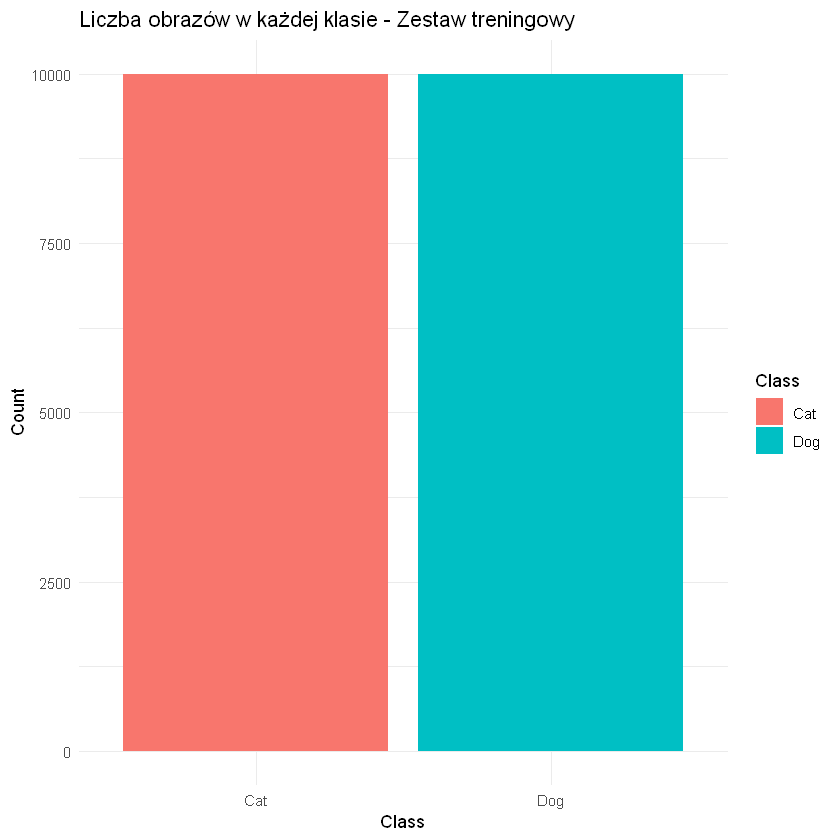

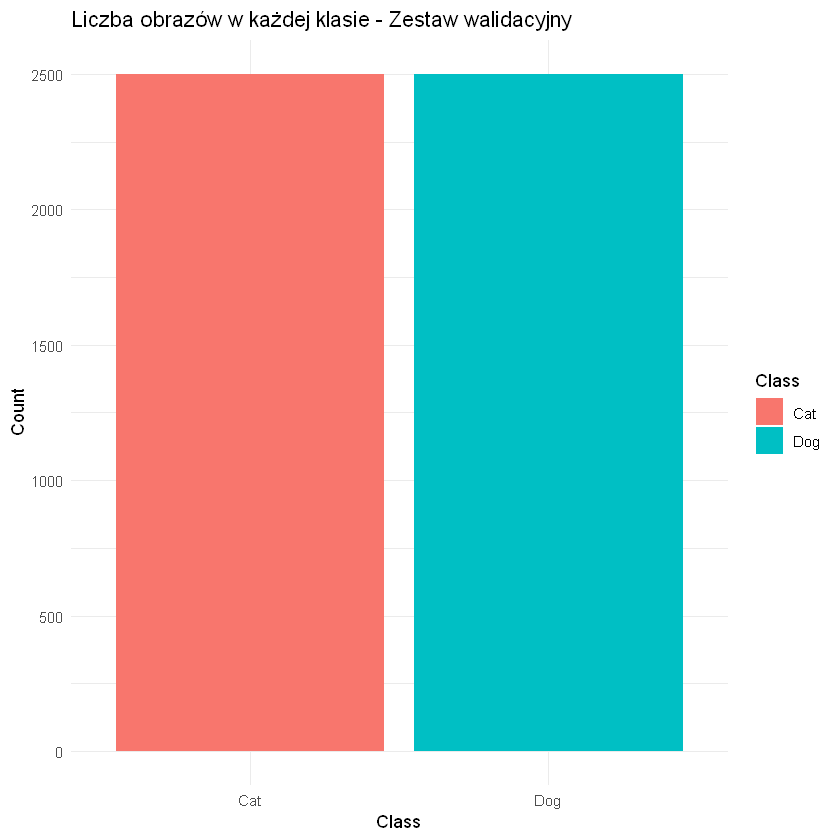

In [92]:
library(ggplot2)
ggplot(train_data, aes(x = Class, y = Count, fill = Class)) +
  geom_bar(stat = "identity") +
  ggtitle("Liczba obrazów w każdej klasie - Zestaw treningowy") +
  theme_minimal()

ggplot(validation_data, aes(x = Class, y = Count, fill = Class)) +
  geom_bar(stat = "identity") +
  ggtitle("Liczba obrazów w każdej klasie - Zestaw walidacyjny") +
  theme_minimal()

In [65]:
model6 <- keras_model_sequential()

model6 %>%
  layer_conv_2d(filter = 32, kernel_size = c(3,3), input_shape = c(width,height, 3)) %>%
  layer_activation("relu") %>%
  layer_max_pooling_2d(pool_size = c(2,2)) %>% 
  
  layer_conv_2d(filter = 32, kernel_size = c(3,3)) %>%
  layer_activation("relu") %>%
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  
  layer_conv_2d(filter = 64, kernel_size = c(3,3)) %>%
  layer_activation("relu") %>%
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  
  layer_flatten() %>%
  layer_dense(64) %>%
  layer_activation("relu") %>%
  layer_dropout(0.5) %>%
  layer_dense(1) %>%
  layer_activation("sigmoid")

model6 %>% compile(
  loss = "binary_crossentropy",
  optimizer = "adam",
  metrics = "accuracy"
)
summary(model6)

Model: "sequential_5"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_17 (Conv2D)                 (None, 148, 148, 32)            896         
 activation_29 (Activation)         (None, 148, 148, 32)            0           
 max_pooling2d_17 (MaxPooling2D)    (None, 74, 74, 32)              0           
 conv2d_16 (Conv2D)                 (None, 72, 72, 32)              9248        
 activation_28 (Activation)         (None, 72, 72, 32)              0           
 max_pooling2d_16 (MaxPooling2D)    (None, 36, 36, 32)              0           
 conv2d_15 (Conv2D)                 (None, 34, 34, 64)              18496       
 activation_27 (Activation)         (None, 34, 34, 64)              0           
 max_pooling2d_15 (MaxPooling2D)    (None, 17, 17, 64)              0           
 flatten_5 (Flatten)                (None, 18496)                   0           
 dense

In [66]:
history6 <- model6 %>% fit(
  train_generator2,
  steps_per_epoch = as.integer(train_samples1/batch_size), 
  epochs = 50, 
  validation_data = validation_generator2,
  validation_steps = as.integer(validation_samples1/batch_size),
  verbose=2
  )

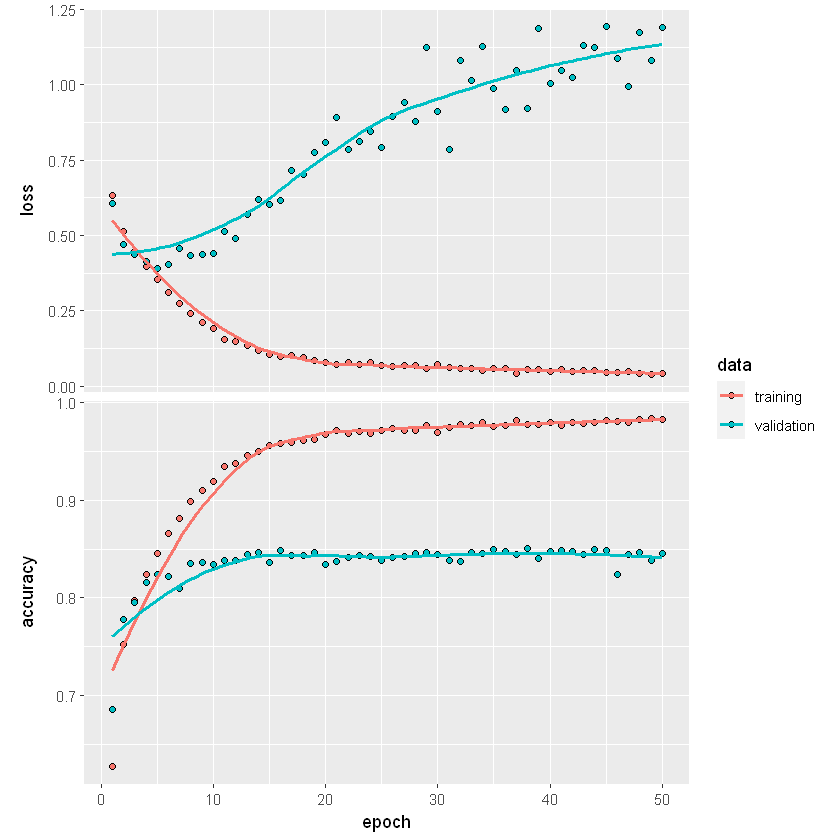

In [68]:
plot(history6)

In [67]:
H6<-model6 %>% evaluate(validation_generator2, validation_samples1, verbose=0)
print(H6)

     loss  accuracy 
1.1889515 0.8458309 


Model został zbudowny w oparciu o 50 epok, jego dokładność to około 84%

In [69]:
history7 <- model6 %>% fit(
  train_generator2,
  steps_per_epoch = as.integer(train_samples1/batch_size), 
  epochs = 300, 
  validation_data = validation_generator2,
  validation_steps = as.integer(validation_samples1/batch_size),
  verbose=2
  )

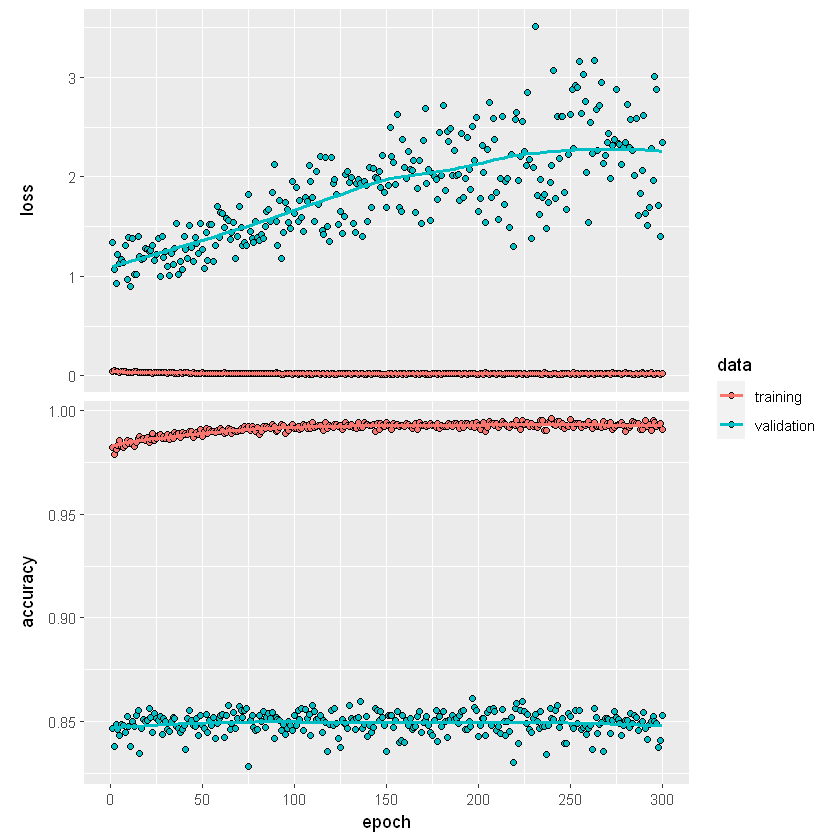

In [70]:
plot(history7)

In [71]:
H7<-model6 %>% evaluate(validation_generator2, validation_samples1, verbose=0)
print(H7)

     loss  accuracy 
2.3442709 0.8530294 


In [73]:
modelprob  <- round((model6$predict_generator(validation_generator2,steps = validation_samples1/batch_size)),digits = 3)
predlabels <- ifelse(modelprob > 0.50,"Dog","Cat")

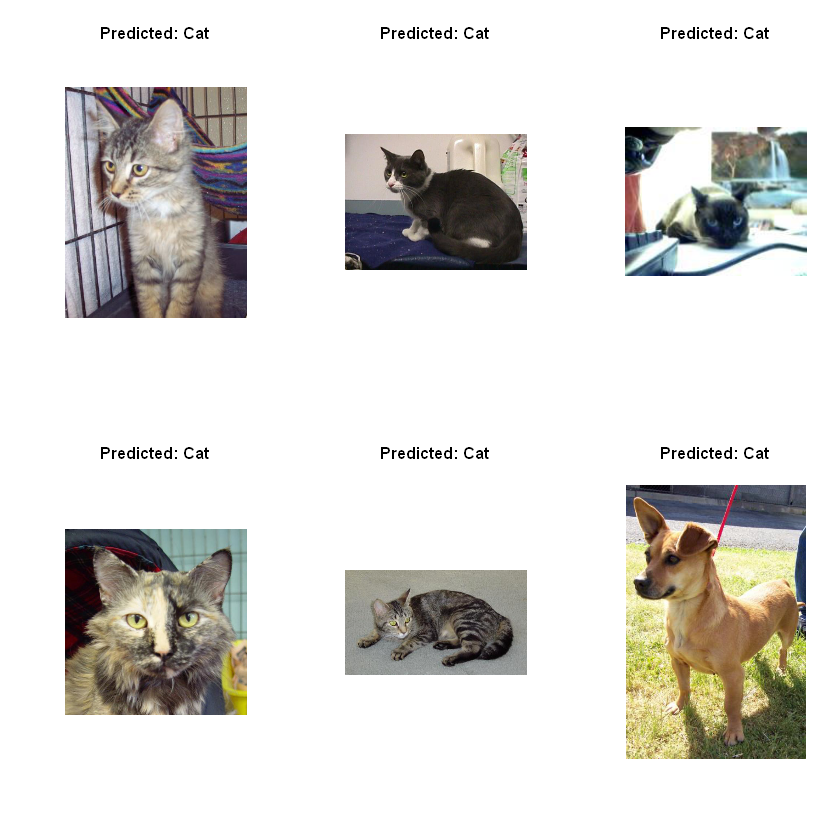

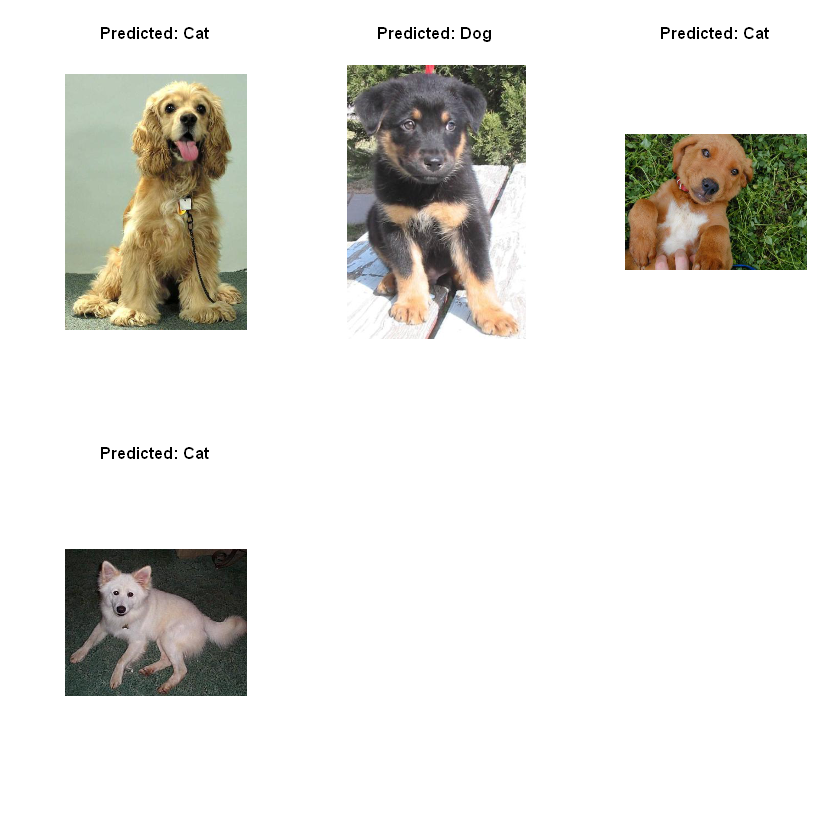

In [89]:
library(imager)
par(mfrow = c(2, 3)) 
# Z walidacyjnego przykładowe
cat_indices <- c(2, 4, 5, 10, 16)  
dog_indices <- c(12225, 12230, 12167, 11972, 12375)

random_ind <- c(cat_indices, dog_indices)

for (i in random_ind) {
  if (i <= 10000) { 
    class_label <- "cat"
  } else { 
    class_label <- "dog"
  }
  
  img_path <- paste0("PetImages2/", class_label, "/", i, ".jpg")
  img <- load.image(img_path)
  plot(img, main = paste("Predicted:", predlabels[which(random_ind == i)]), axes = FALSE)
  
}

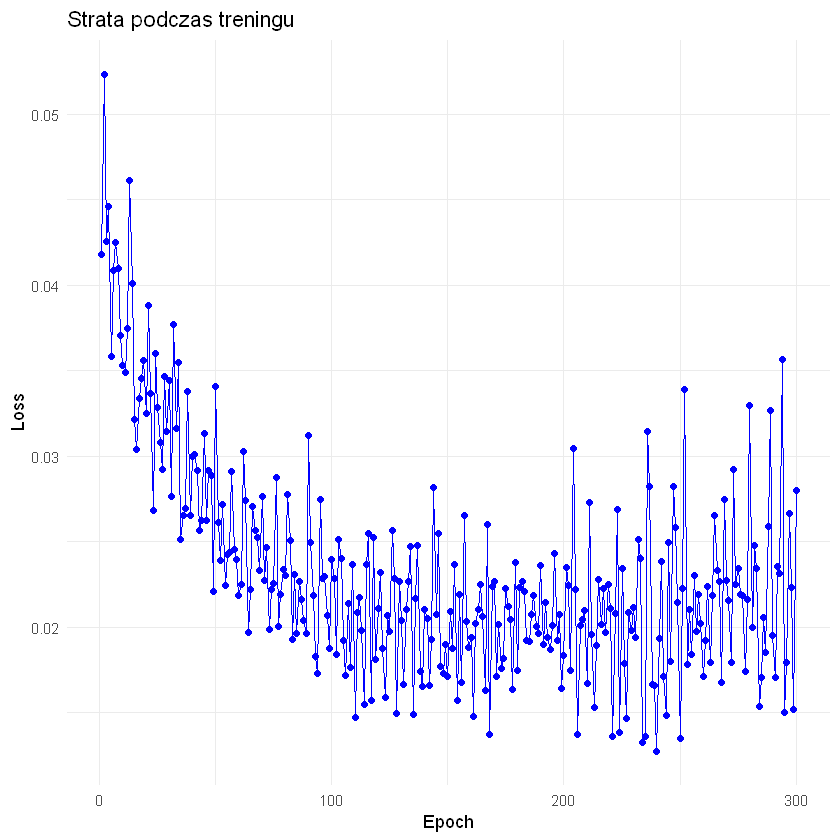

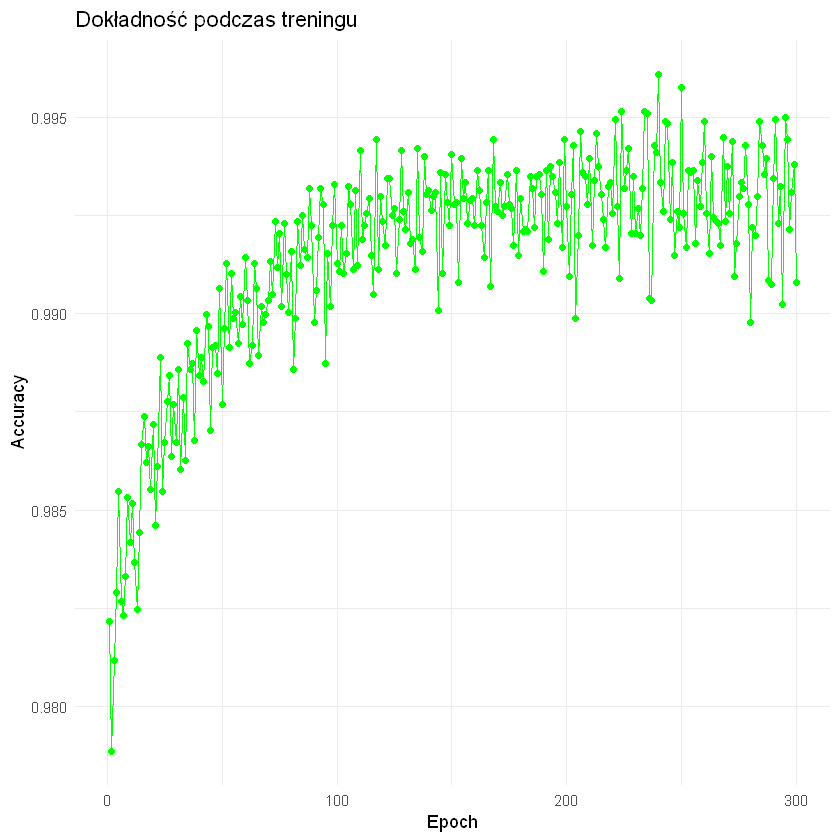

In [94]:
library(ggplot2)

epochs <- seq_len(length(history7$metrics$loss))

df_training <- data.frame(
  Epoch = epochs,
  Loss = history7$metrics$loss,
  Accuracy = history7$metrics$accuracy
)

ggplot(df_training, aes(x = Epoch, y = Loss)) +
  geom_line(color = "blue") +
  geom_point(color = "blue") +
  ggtitle("Strata podczas treningu") +
  ylab("Loss") + xlab("Epoch") +
  theme_minimal()

ggplot(df_training, aes(x = Epoch, y = Accuracy)) +
  geom_line(color = "green") +
  geom_point(color = "green") +
  ggtitle("Dokładność podczas treningu") +
  ylab("Accuracy") + xlab("Epoch") +
  theme_minimal()

In [95]:
save_model_weights_hdf5(model6, 'model6_300_epochs.h5', overwrite = TRUE)

Model został zbudowany w oparciu o 300 epok jego dokładność jest większa niż 85%. Proces uczenia trwał około 442 minuty, co daje w przybliżeniu około 7,36 h 

    loss  accuracy 
    2.3442709 0.8530294

Spróbuję teraz stworzyć model w oparciu o obrazy w skali szarości

In [7]:
train_grey <- flow_images_from_directory(train_files1,generator = train1,
  target_size = c(width, height), color_mode = "grayscale",
  class_mode = "binary", batch_size = batch_size, shuffle = TRUE,
  seed = 999)

In [8]:
validation_grey <- flow_images_from_directory(val_files1,generator = validation1,
  target_size = c(width, height), color_mode = "grayscale", 
  class_mode = "binary", batch_size = batch_size, shuffle = FALSE,
  seed = 999)

In [9]:
model_grey <- keras_model_sequential()

model_grey %>%
#zamiana liczby kanałów wejściowych 
  layer_conv_2d(filter = 32, kernel_size = c(3,3), input_shape = c(width,height, 1)) %>%
  layer_activation("relu") %>%
  layer_max_pooling_2d(pool_size = c(2,2)) %>% 
  
  layer_conv_2d(filter = 32, kernel_size = c(3,3)) %>%
  layer_activation("relu") %>%
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  
  layer_conv_2d(filter = 64, kernel_size = c(3,3)) %>%
  layer_activation("relu") %>%
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  
  layer_flatten() %>%
  layer_dense(64) %>%
  layer_activation("relu") %>%
  layer_dropout(0.5) %>%
  layer_dense(1) %>%
  layer_activation("sigmoid")

model_grey %>% compile(
  loss = "binary_crossentropy",
  optimizer = "adam",
  metrics = "accuracy"
)
summary(model_grey)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_2 (Conv2D)                  (None, 148, 148, 32)            320         
 activation_4 (Activation)          (None, 148, 148, 32)            0           
 max_pooling2d_2 (MaxPooling2D)     (None, 74, 74, 32)              0           
 conv2d_1 (Conv2D)                  (None, 72, 72, 32)              9248        
 activation_3 (Activation)          (None, 72, 72, 32)              0           
 max_pooling2d_1 (MaxPooling2D)     (None, 36, 36, 32)              0           
 conv2d (Conv2D)                    (None, 34, 34, 64)              18496       
 activation_2 (Activation)          (None, 34, 34, 64)              0           
 max_pooling2d (MaxPooling2D)       (None, 17, 17, 64)              0           
 flatten (Flatten)                  (None, 18496)                   0           
 dense_1

In [10]:
history_grey <- model_grey%>% fit(
  train_grey,
  steps_per_epoch = as.integer(train_samples1/batch_size), 
  epochs = 200, 
  validation_data = validation_grey,
  validation_steps = as.integer(validation_samples1/batch_size),
  verbose=2
  )

In [11]:
grey<-model_grey %>% evaluate(validation_grey, validation_samples1, verbose=0)
print(grey)

     loss  accuracy 
1.5777638 0.8456309 


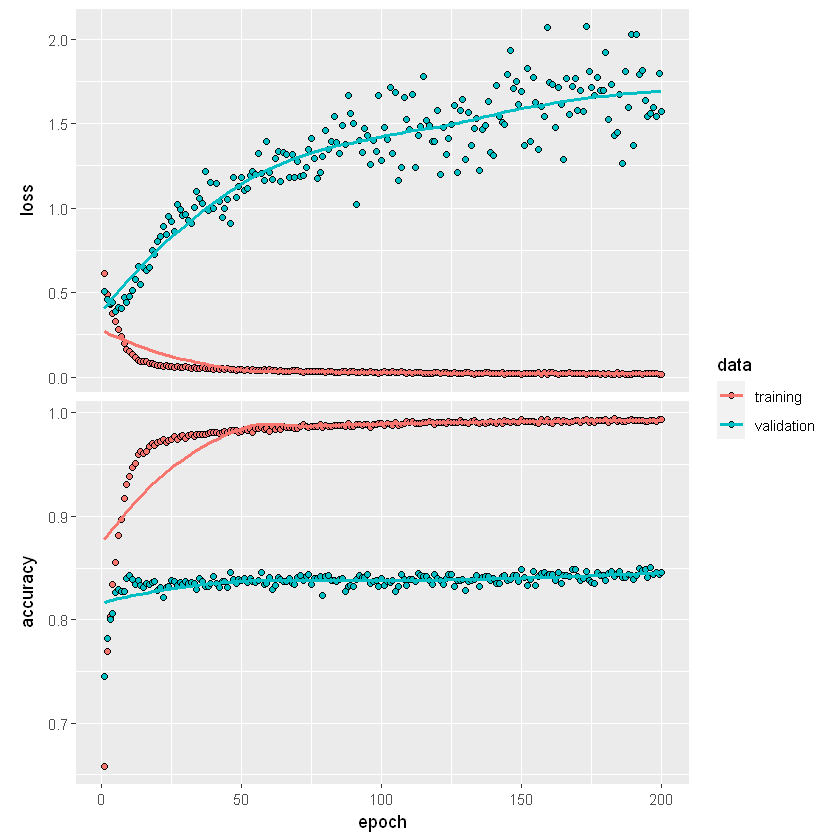

In [12]:
plot(history_grey)

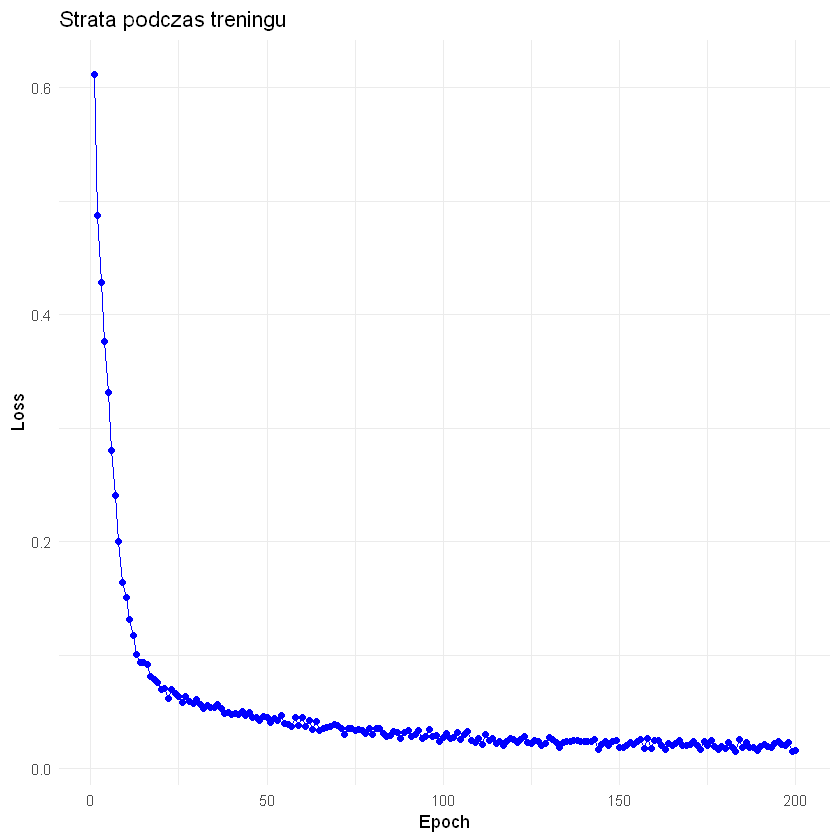

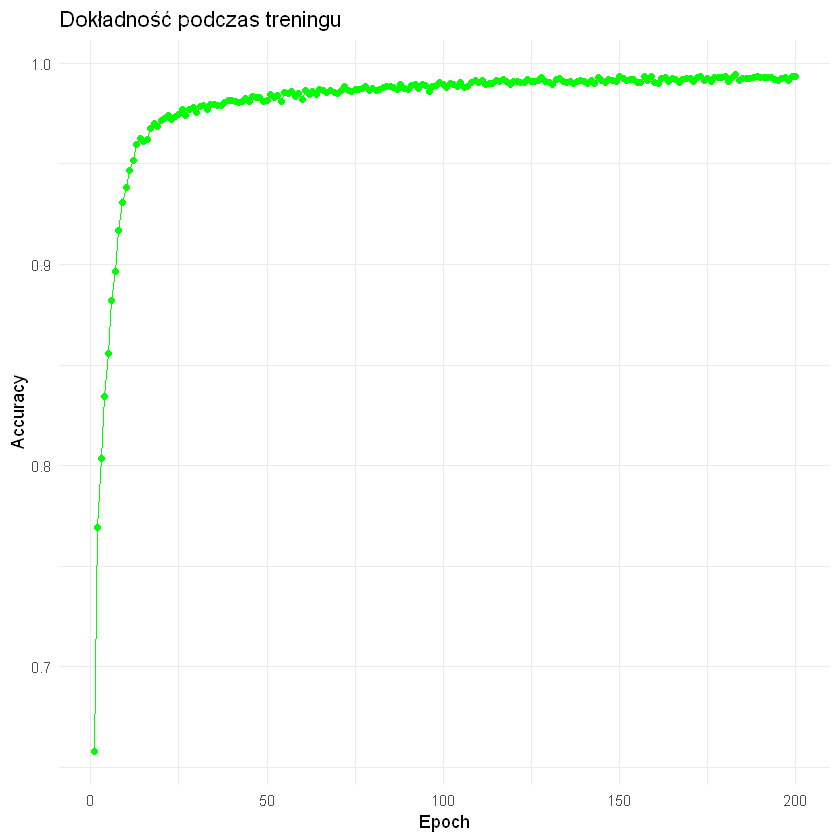

In [13]:
library(ggplot2)

epochs <- seq_len(length(history_grey$metrics$loss))

df_training <- data.frame(
  Epoch = epochs,
  Loss = history_grey$metrics$loss,
  Accuracy = history_grey$metrics$accuracy
)

ggplot(df_training, aes(x = Epoch, y = Loss)) +
  geom_line(color = "blue") +
  geom_point(color = "blue") +
  ggtitle("Strata podczas treningu") +
  ylab("Loss") + xlab("Epoch") +
  theme_minimal()

ggplot(df_training, aes(x = Epoch, y = Accuracy)) +
  geom_line(color = "green") +
  geom_point(color = "green") +
  ggtitle("Dokładność podczas treningu") +
  ylab("Accuracy") + xlab("Epoch") +
  theme_minimal()

In [14]:
modelprob  <- round((model_grey$predict_generator(validation_grey,steps = validation_samples1/batch_size)),digits = 3)
predlabels <- ifelse(modelprob > 0.50,"Dog","Cat")

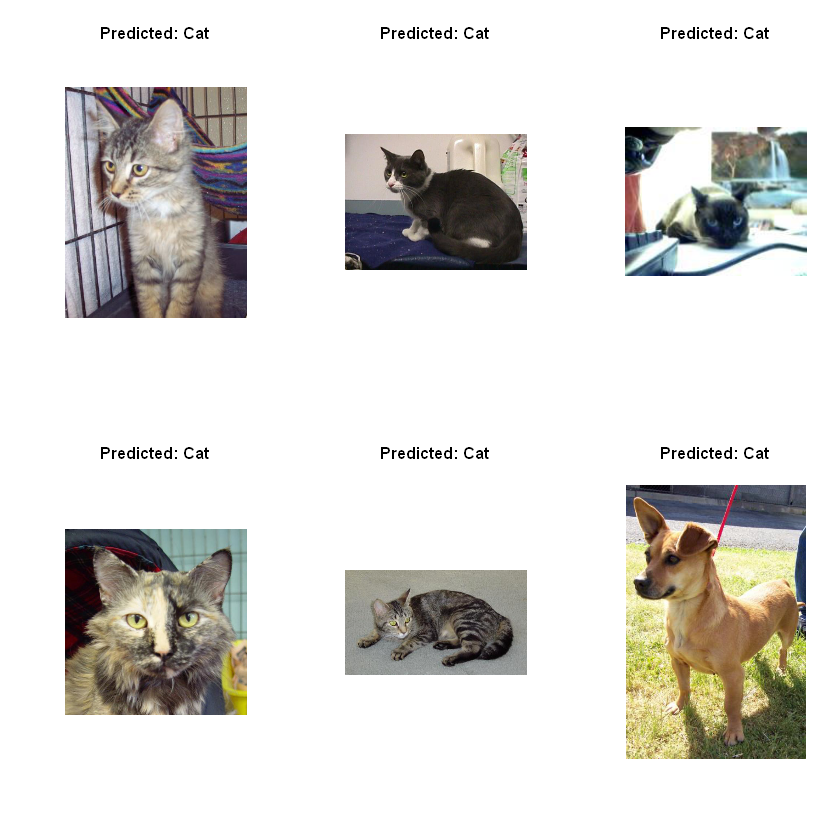

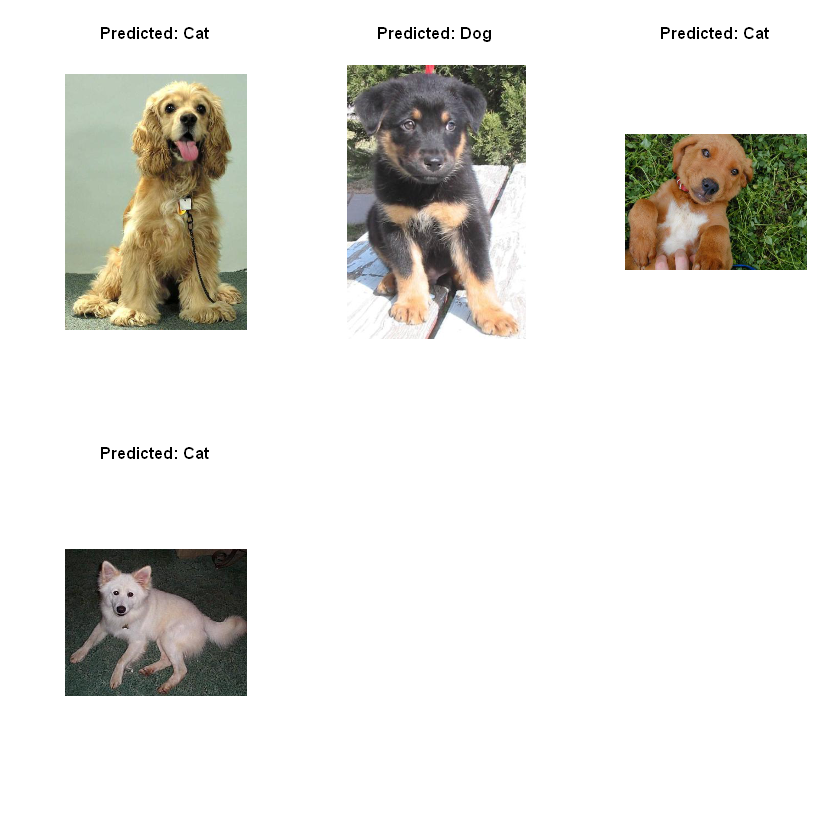

In [16]:
library(imager)
par(mfrow = c(2, 3)) 
# Z walidacyjnego przykładowe
cat_indices <- c(2, 4, 5, 10, 16)  
dog_indices <- c(12225, 12230, 12167, 11972, 12375)

random_ind <- c(cat_indices, dog_indices)

for (i in random_ind) {
  if (i <= 10000) { 
    class_label <- "cat"
  } else { 
    class_label <- "dog"
  }
  
  img_path <- paste0("PetImages2/", class_label, "/", i, ".jpg")
  img <- load.image(img_path)
  plot(img, main = paste("Predicted:", predlabels[which(random_ind == i)]), axes = FALSE)
  
}

Budowa modelu w oparciu o model VGG16. Wykorzystam model, który jest wstępnie wytrenowany i douczę go w oparciu o dane zdjęć psów i kotów w celu analizy.

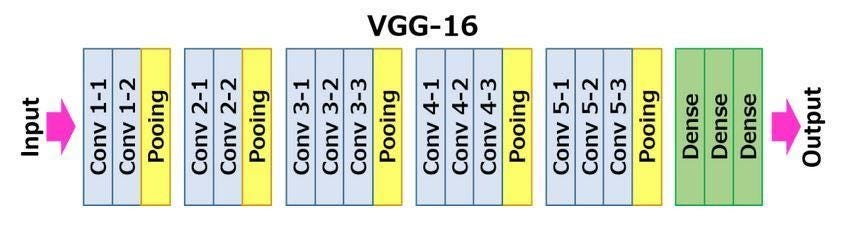

Wczytanie modelu wstępnie wytrenowanego

In [12]:
vgg16 <- application_vgg16(include_top = FALSE, weights = "imagenet", input_shape=c(width,height, 3))

Zamrożenie warstw bazowych zapobiega ich aktualizacji podczas treningu. W ten sposób trenowane są tylko nowe warstwy dodane na wierzchu.

In [13]:
freeze_weights(vgg16)

In [15]:
model_fineTuned <- keras_model_sequential()

model_fineTuned %>%
  vgg16 %>% 
  layer_flatten() %>%
  layer_dense(256) %>%
  layer_activation("relu") %>%
  layer_dropout(0.5) %>%
  layer_dense(1) %>%
  layer_activation("sigmoid")

model_fineTuned %>% compile(
  loss = "binary_crossentropy",
  optimizer = optimizer_adam(lr = 0.0001),
  metrics = "accuracy")

In [16]:
historyFT <- model_fineTuned %>% fit(
  train_generator2,
  steps_per_epoch = as.integer(train_samples1/batch_size), 
  epochs = 20, 
  validation_data = validation_generator2,
  validation_steps = as.integer(validation_samples1/batch_size),
  verbose=2
  )

In [17]:
ft<-model_fineTuned %>% evaluate(validation_generator2, validation_samples1, verbose=0)
print(ft)

     loss  accuracy 
0.3077752 0.9188162 


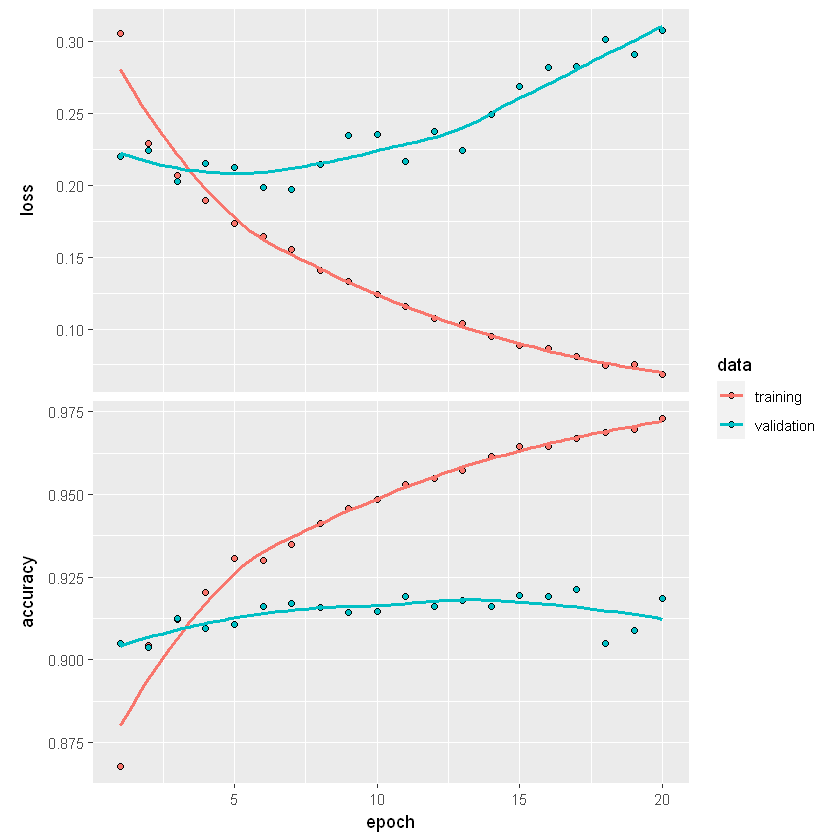

In [18]:
plot(historyFT)

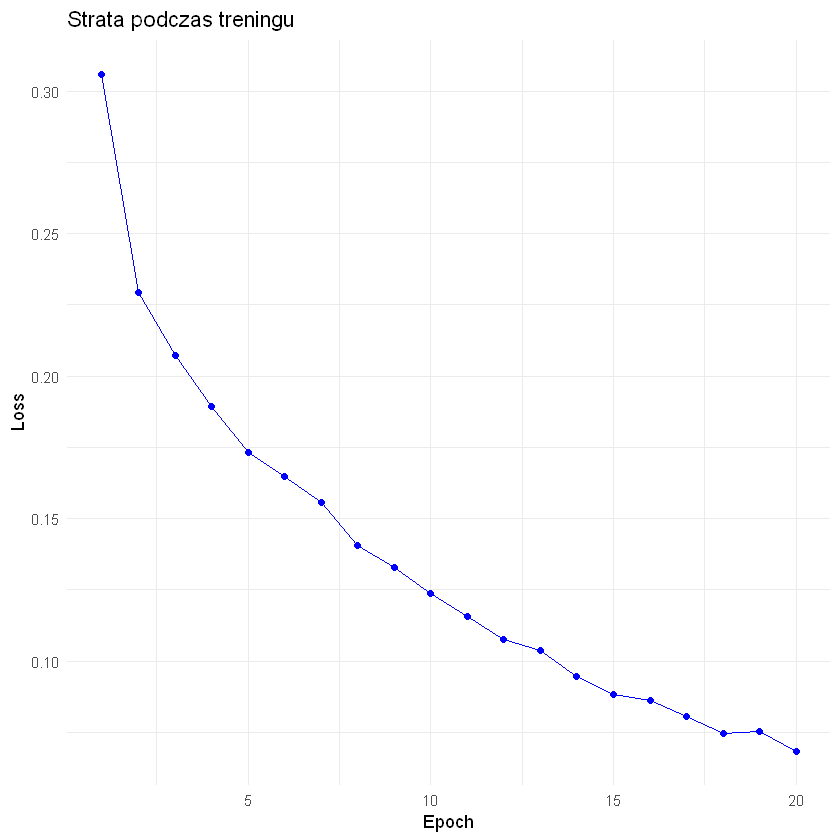

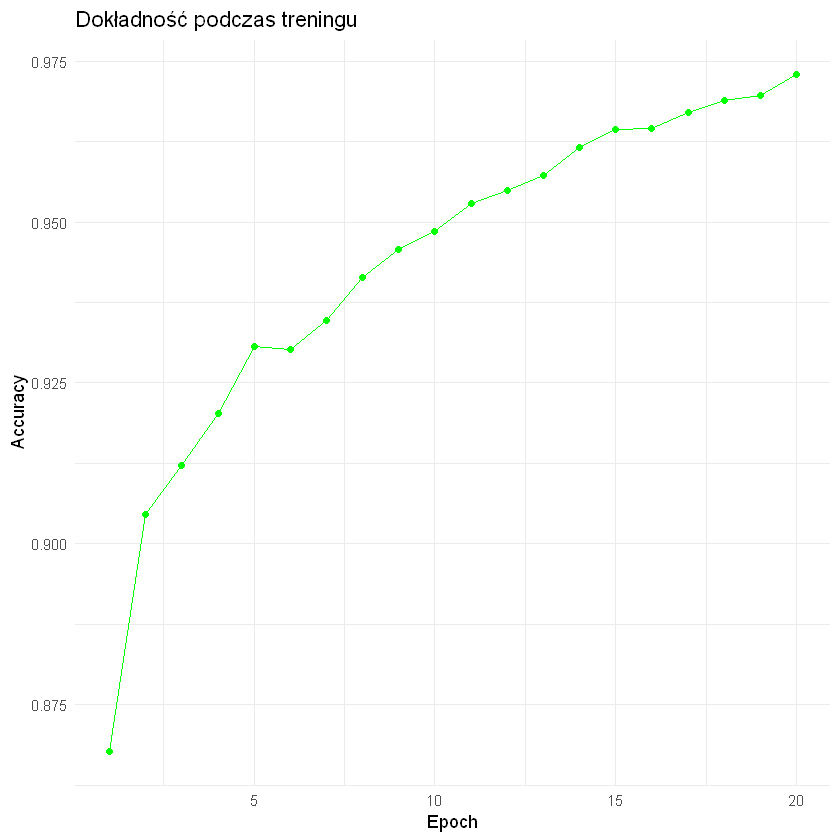

In [19]:
library(ggplot2)

epochs <- seq_len(length(historyFT$metrics$loss))

df_training <- data.frame(
  Epoch = epochs,
  Loss = historyFT$metrics$loss,
  Accuracy = historyFT$metrics$accuracy
)

ggplot(df_training, aes(x = Epoch, y = Loss)) +
  geom_line(color = "blue") +
  geom_point(color = "blue") +
  ggtitle("Strata podczas treningu") +
  ylab("Loss") + xlab("Epoch") +
  theme_minimal()

ggplot(df_training, aes(x = Epoch, y = Accuracy)) +
  geom_line(color = "green") +
  geom_point(color = "green") +
  ggtitle("Dokładność podczas treningu") +
  ylab("Accuracy") + xlab("Epoch") +
  theme_minimal()

In [20]:
modelprob  <- round((model_fineTuned$predict_generator(validation_generator2,steps = validation_samples1/batch_size)),digits = 3)
predlabels <- ifelse(modelprob > 0.50,"Dog","Cat")

In [25]:
true_labels <- validation_generator2$classes
true_labels_text <- ifelse(true_labels == 0, "Cat", "Dog")

Confusion Matrix and Statistics

     Predicted
True   Cat  Dog
  Cat 2281  220
  Dog  186 2314
                                          
               Accuracy : 0.9188          
                 95% CI : (0.9109, 0.9262)
    No Information Rate : 0.5067          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8376          
                                          
 Mcnemar's Test P-Value : 0.1015          
                                          
            Sensitivity : 0.9246          
            Specificity : 0.9132          
         Pos Pred Value : 0.9120          
         Neg Pred Value : 0.9256          
             Prevalence : 0.4933          
         Detection Rate : 0.4561          
   Detection Prevalence : 0.5001          
      Balanced Accuracy : 0.9189          
                                          
       'Positive' Class : Cat             
                                          

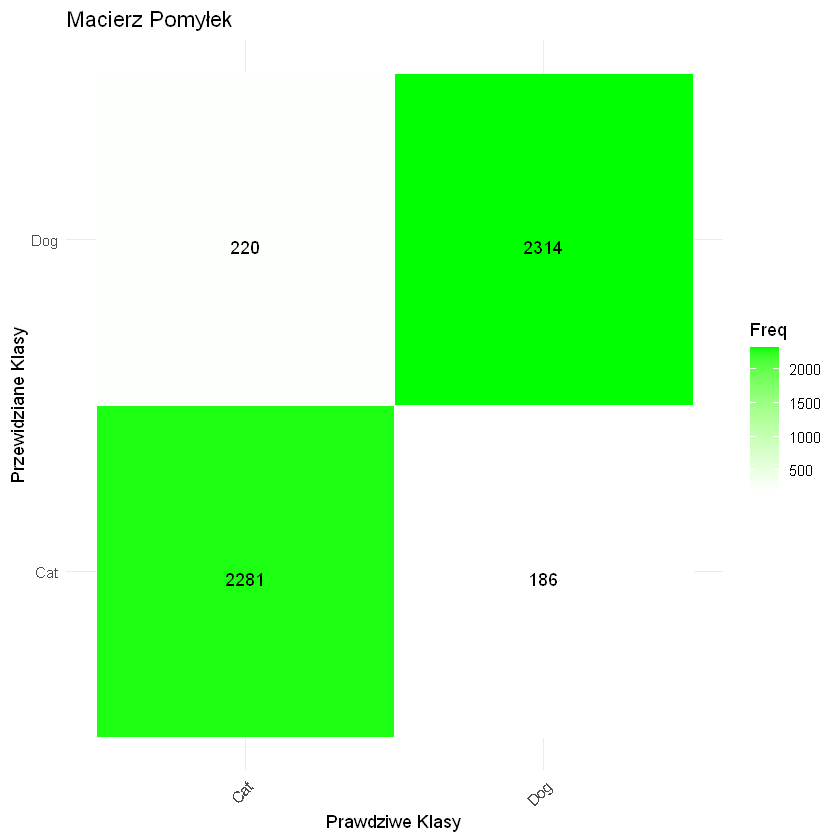

In [32]:
confusion_matrix <- table(True = true_labels_text, Predicted = predlabels)
library(caret)
confusionMatrix(confusion_matrix)
confusion_df <- as.data.frame(as.table(confusion_matrix))
ggplot(data = confusion_df, aes(x = True, y = Predicted, fill = Freq)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "white", high = "green") +
  geom_text(aes(label = Freq), vjust = 1) +
  theme_minimal() +
  labs(title = "Macierz Pomyłek", x = "Prawdziwe Klasy", y = "Przewidziane Klasy") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Wnioski 

Na podstawie utworzonych modeli najdokładnieszy model jaki udało mi się uzyskać to model, który ma dokładność 0.9188162. Testowałem zdjęcia rgb jak i w skali szarości, rgb dają lepszy rezultat. Najlepszy model powstał w oparciu o douczenie modelu VGG16. Współczynnik kappa wynosi 83%, zatem powstały model ma wysoką dokładność i dobrze dostosowuje się do nowych danych, warto również zauwazyć, iż model ten ma najniższą stratę, co może świadczyć o tym, iż dobrze generalizuje.